# Week 10 HW: Linear Algebra

Please be sure your functions work for vectors with a size of three and matrices that are 3x3 and use appropriate error handling. Bonus points if you can further generalize them for larger vectors and matrices. 

1. Explain the dot product and cross product in your own words in markdown. Use LaTeX to properly show the equations.

Dot product is the multiplication of two vectors and is denoted by a · b (read "a dot b"). To get the result, you multiply the values of the magnitude (or length) of your vectors by the cosine of the angle of the vectors. The result will be a scalar value and not a vector. This will tell us interaction between the dimensions. Another way of calculating the dot product is by multiplying the x values of a and b, multiplying the y values of a and b, and then adding them together. If there are three dimensions then you do the same multiplication of the z value of a and b, then adding. 

$$ a \cdot b = \parallel a \parallel \cdot \parallel b \parallel \cdot cos(\theta) $$

$$ a \cdot b = a_x \times b_x + a_y \times b_y + a_z \times b_z $$

Cross product is the multiplication of two vectors and is denoted by a x b. The result is a new vector that is perpendicular to both the input vectors. To calculate the new vector, the magnitude of vector a and b are multiplied by the sine of the angle of the two vectors by n to give it the directionality.

$$ a \times b = \parallel a \parallel \cdot \parallel b \parallel \cdot sin(\theta) \cdot n $$

$$ a \times b = (c_x, c_y, c_z) $$
$$ c_x = a_y \cdot b_z − a_z \cdot b_y $$
$$ c_y = a_z \cdot b_x − a_x \cdot b_z $$
$$ c_z = a_x \cdot b_y − a_y \cdot b_x $$

2. Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated. 

In [101]:
#Import dependencies
import numpy as np
from numpy.linalg import norm
from numpy import arccos, dot
import pandas as pd
#creating two random vectors. 
a = np.array([[4, 5, 7]])
b = np.array([[8, 3, 5]])
#creating a function in order to find the angle between any given two vectors. 
def angle_between(v1, v2):
    try:
        dot_prod = dot(v1, v2.T) #making a variable with the dot product of the two given vectors. 
        #one of the vectors must be transposed in order for the dot product to work because you must 
        #have a row vector and a column vector. 
        divisor = norm(v1)*norm(v2) # making the divisor variable by multiplying the norm of both vectors. 
        
        if divisor == 0: #introducing some error handling for zero denominator errors. 
            print("Can't divide by zero")
        
    except Exception as e: #catch all other exceptions. 
        print(e) 
        
    else: 
        theta = arccos(dot_prod/divisor) # calculation to find the angle. 
        print(theta)
        

angle_between(a, b)

[[0.50920711]]


In [6]:
#testing the error handling if the divisor is zero. 

c = np.array([[0, 0, 0]])
d = np.array([[7, 6, 5]])

angle_between(c, d)

Can't divide by zero
[[nan]]


/var/folders/zx/rtlkvk155rx_pz72fst65zhh0000gn/T/ipykernel_8009/616384279.py:23: RuntimeWarning: invalid value encountered in true_divide
  theta = arccos(dot_prod/divisor) # calculation to find the angle.


3. Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).

In [30]:
#Creating a matrix and giving it the variable name A. 
A = np.array([[9,1,1],
             [6,1,8],
             [3,1,4],
             [2,1,7]])
#creating a function when given a matrix and row numbers, it will produce the dot product of those rows. 
def row_dot(A, r1, r2):

    try:
        dotprod = dot(A[r1],A[r2]) #The dot product is taken of the two rows by putting 
        # the variable of the function as the index of the matrix. 
    
    except Exception as e: #catch all exceptions. 
            return(e)

    else:
        return(dotprod) #Finally print out the dot product of the two rows selected. 
    
row_dot(A,1,2)

51

4. Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

In [38]:
#Creating my two matracies called mat1 and mat2. 
mat1 = ([1, 2, 3],
        [4 ,5, 6],
        [7, 8, 9])
mat2 = ([2, 4, 8],
        [6, 4, 2],
        [5, 7, 9])
# Creating a function that takes in two matracies and divides them. 
#The trick to matrix division is that you actually multiply the first matrix by the inverse of the second matrix. 
def matrix_division(m1, m2):
    
    try:
        m2 = np.linalg.inv(m2) # function to invert the second matrix. 
        mat_div = dot(m1, m2) # dot product function used to multiply the two matracies. 
        
    except Exception as e: #catch any exceptions. 
            return(e)
        
    else: 
        print(mat_div) #printing out the matrix division. 
        
matrix_division(mat1, mat2)

[[ 0.00000000e+00 -1.36363636e-01  3.63636364e-01]
 [ 0.00000000e+00  1.36363636e-01  6.36363636e-01]
 [ 2.22044605e-16  4.09090909e-01  9.09090909e-01]]


5. Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise. 

In [59]:
#creating column vectors to test. 
e = np.array([[6], [7], [8]])
f = np.array([[9], [10], [11]])
u = np.array([[12], [13], [14], [15]])

def is_orthogonal(v1, v2, tol):
    
    try:
       #need to do error handeling before 
        if v1.shape != v2.shape: #The two vectors much be the same size. 
            return("vectors not equal")
        
        elif tol <= 0: #the tol must be larger than zero
            return("Tol must be larger than zero")

        else: 
            # in order to find the angle we need to do like in question 2. 
            # the two vectors must first by flattened by using the ravel() function. 
            # take the dot product of the two vectors and divide by the product of the two vector norms or lengths. 
            #Then using the arccos function to find the angle. 
            angle = np.arccos((dot(v1.ravel(),v2.ravel()))/(norm(v1)*norm(v2)))
            
            if abs(np.pi/2-angle)<tol:
                return("1") # a '1' will print if the angle is within tol. 
            
            else:
                return("0") # a '0' will print if the angle is not within tol. 
    
    except Exception as e: #to catch all other errors. 
        return e
    
print(is_orthogonal(e, f, 0))#testing the tol error handeling. 
print(is_orthogonal(e, u, 0.5)) #testing the vector lengths error handeling. 
print(is_orthogonal(e, f, 0.0001))

x = np.array([[1], [1]])
w = np.array([[-1], [1]])

print(is_orthogonal(x, w, 0.0001)) # needed to test to make sure I could get a '1'. 

Tol must be larger than zero
vectors not equal
0
1


6. Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4. 

In [97]:
vec1 = np.array([[2],[4],[6],[8]])
vec2 = np.array([[3],[5],[7],[9]])

class vector_calculator():
    def __init__(self, vector1, vector2):
        self.v1=np.ravel(vector1)
        self.v2=np.ravel(vector2)
        
# Copy and pasting function from question #2. 
    def angle_between(self):
        v1 = self.v1
        v2 = self.v2
        try:
            dot_prod = dot(v1, v2.T)
            divisor = norm(v1)*norm(v2)
            if divisor == 0:
                print("Can't divide by zero")
            else:
                theta = arccos(dot_prod/divisor) # calculation to find the angle. 
                print(theta)
        except Exception as e:
            return(e)
        
 # Copy and pasting function from question #5. 
    def is_orthogonal(self, tol=0):
        v1 = self.v1
        v2 = self.v2
        try:
            if len(v1) != len(v2):
                print('Vectors must be of equal length')
            elif tol <= 0:
                print('Scalar value must be larger than 0')
            else:
                angle = np.arccos((dot(v1.ravel(),v2.ravel()))/(norm(v1)*norm(v2)))
                if abs(np.pi/2-angle)<tol:
                    print("1")
                else:
                    print("0")
        except Exception as e:
            return e
        

c = vector_calculator(vec1, vec2)

print(c.angle_between())
print(c.is_orthogonal(tol=0))
print(c.is_orthogonal(tol=0.5))

0.06380094676987083
None
Scalar value must be larger than 0
None
0
None


7. Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!

In [109]:
import pandas as pd
import numpy as np
import statistics
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop

In [110]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels, (569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [112]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

In [113]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [114]:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [115]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [116]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])

In [117]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

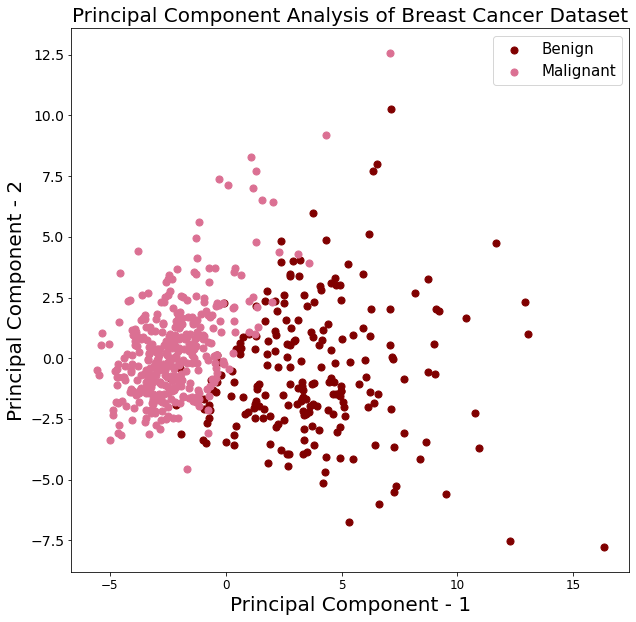

In [119]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['maroon', 'palevioletred']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
plt.legend(targets,prop={'size': 15})

### What is PCA?

PCA stands for Principal Component Analysis. It is a "linear dimensionality reduction technique". Just like the definition would imply, it takes a very large data set and breaks it down into more managable chucks all while keeping most of the information. It trades accuracy for simplicity so that machine learning algorithms don't have as much to process and burden the system. This is used for data visualization and machine learning. 